## Time series analysis and clustering

In this note book we will analyse time series using self organized maps.
We will use the roboric failure data from [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures)
The data is already downloaded and mapped into a csv file in the data repository.

In [11]:
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../..')
from lightSOM import SOM

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
#load dataset
robot_data = pd.read_csv('data/robotic_failure.csv')

#prepare data
robot_data=robot_data.drop(columns=['F_x', 'F_y', 'T_x', 'T_y', 'T_z'])
robot_data

,id,time,F_z,Failure
0,1,0,63,True
1,1,1,62,True
2,1,2,61,True
3,1,3,63,True
4,1,4,63,True
...,...,...,...,...
1315,88,10,39,False
1316,88,11,38,False
1317,88,12,23,False
1318,88,13,26,False


In [155]:
#robot_data=pd.DataFrame(pd.pivot_table(robot_data, values='F_z', 
#                     index=['id', 'Failure'], 
#                     columns='time'))
robot_data.head()

,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,Failure,,,,,,,,,,,,,,,
1,True,63,62,61,63,63,63,63,63,63,61,61,64,64,60,64
2,True,63,63,61,63,59,57,70,61,53,66,58,66,67,66,59
3,True,57,63,51,68,65,61,61,57,59,65,64,66,61,65,54
4,True,59,61,56,64,62,60,56,66,64,58,70,64,67,63,63
5,True,65,56,58,56,57,65,56,60,67,60,63,73,57,59,57


In [156]:
%autoreload 2
import pandas as pd

target=robot_data.index.get_level_values('Failure')
data=robot_data.values

net=SOM().create(5, 5, data, target=target, pci=True, pbc=False)

net.train(1.5, epochs=5000, random_order=True, keep_error_history=True)


Periodic Boundary Conditions inactive.
The weights will be initialised with PCA.


 [  614 / 5000 ]  12% - 0:00:02 left 

 [  989 / 5000 ]  20% - 0:00:02 left 

 [ 1325 / 5000 ]  26% - 0:00:02 left 

 [ 1658 / 5000 ]  33% - 0:00:02 left 

 [ 1983 / 5000 ]  40% - 0:00:01 left 

 [ 2364 / 5000 ]  47% - 0:00:01 left 

 [ 2742 / 5000 ]  55% - 0:00:01 left 

 [ 3123 / 5000 ]  62% - 0:00:01 left 

 [ 3494 / 5000 ]  70% - 0:00:00 left 

 [ 3885 / 5000 ]  78% - 0:00:00 left 

 [ 4261 / 5000 ]  85% - 0:00:00 left 

 [ 4631 / 5000 ]  93% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 347.0915169776575

 topological error: 0.011363636363636364
Training SOM... done!


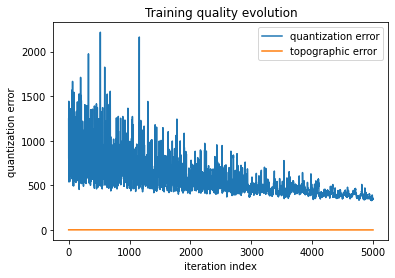

In [157]:
from lightSOM.visualization.som_view import SOMView
vhts  = SOMView(net, 10,10, text_size=10)
vhts.plot_training_errors()

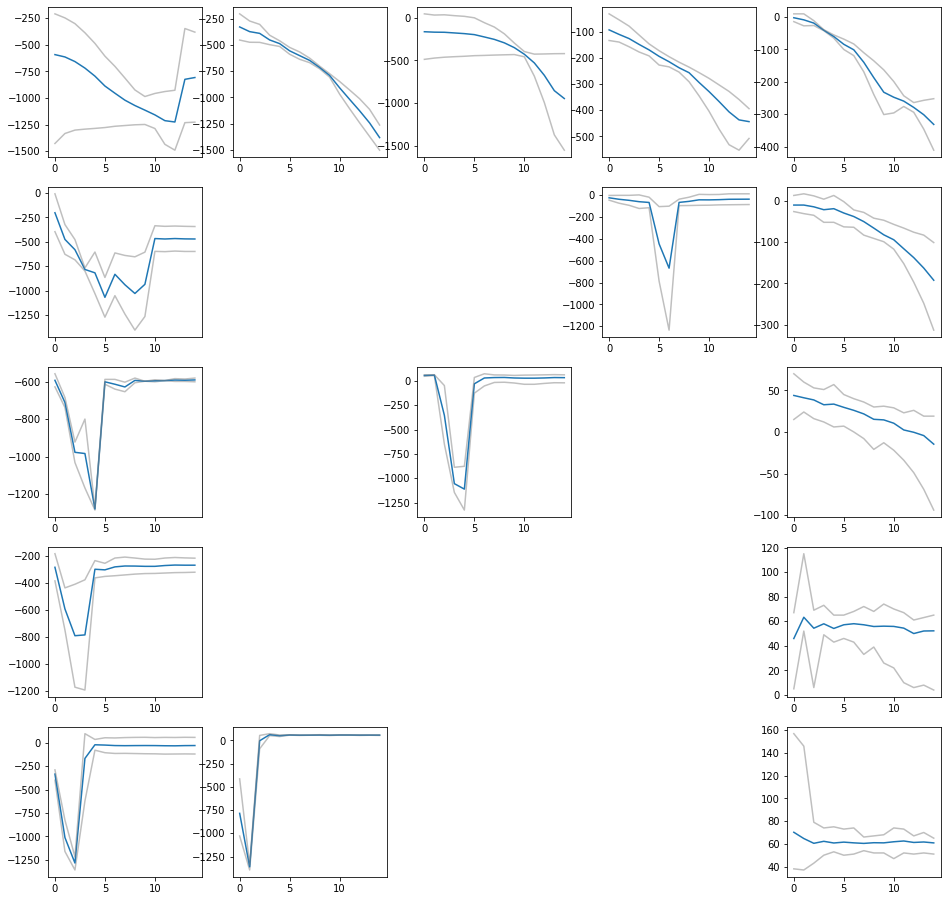

In [161]:
win_map = net.bmu_map(data)

plt.figure(figsize=(16, 16))
the_grid = GridSpec(5, 5)
for position in win_map.keys():
    plt.subplot(the_grid[4-position[1], position[0]])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
plt.savefig('time_series.png')
plt.show()

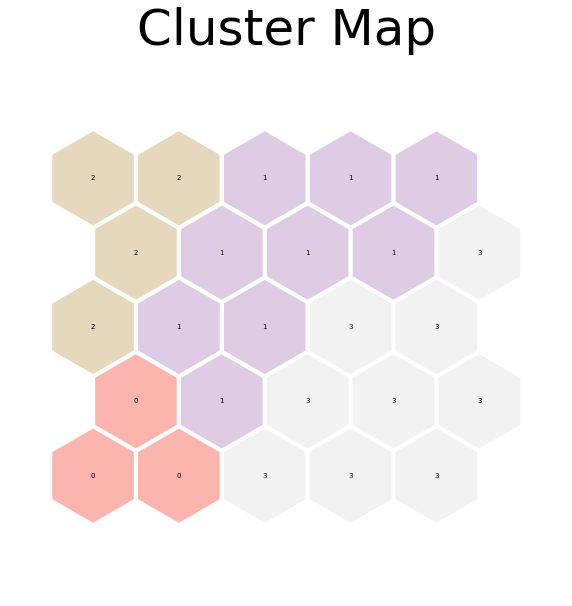

In [162]:
from lightSOM.visualization.som_view import SOMView
vhts  = SOMView(net, 10,10, text_size=10)
vhts.plot_cluster_map(n_clusters=4, anotate=True)


/Users/mohamedmentis/Dropbox/My Mac (MacBook-Pro.local)/Documents/Mentis/Development/light-SOM/lightSOM/examples/../../lightSOM/visualization/hexagons.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  cbar.ax.tick_params(labelsize=20/np.log2(len(titles)))


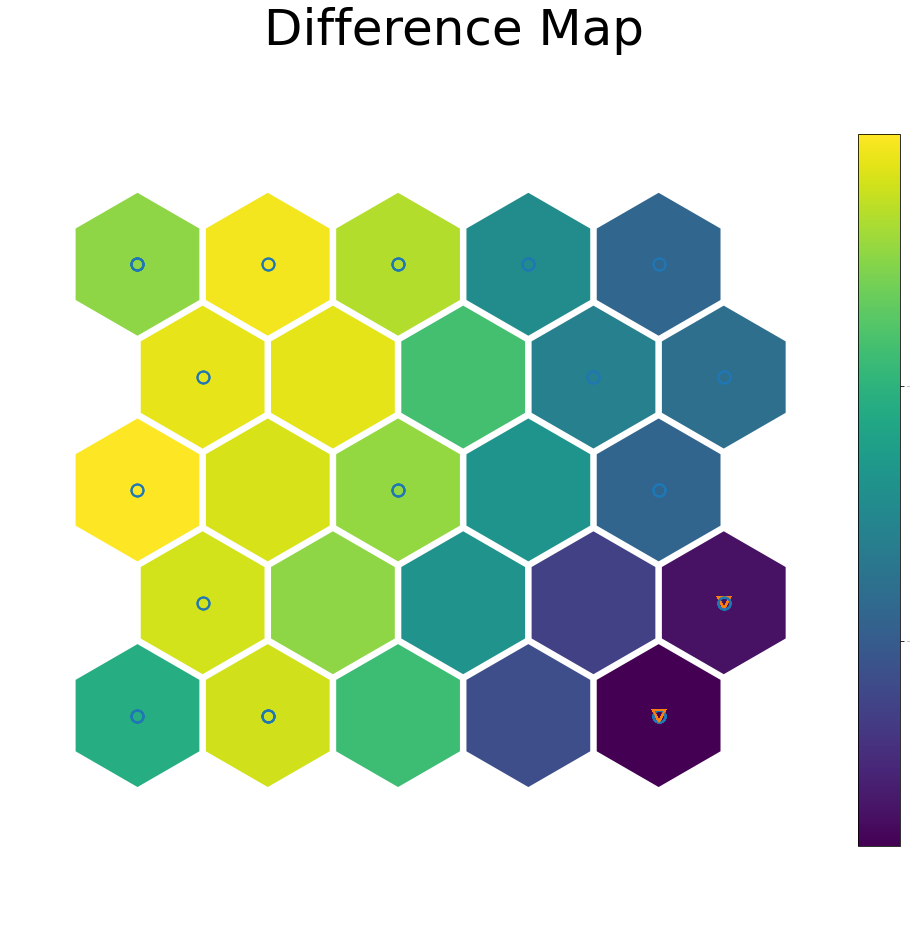

In [163]:
vhts.plot_diffs(denormalize=True, annotate_target=True)

In [159]:
result.to_csv('data/robotic_failure.csv')